# Hyperparameter, Feature Selection, and Adjustment AUC-ROC Curve in Classification.

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Prepare Dataset

Using cancer dataset, Tumors can be benign (noncancerous) or malignant (cancerous). Benign class 0 and Malignant class 1

In [166]:
df = pd.read_csv('cancer_classification.csv')

In [167]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Simple EDA

## Dataset Classes Ratio

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

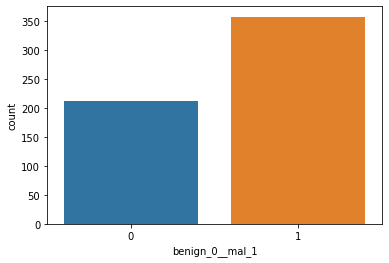

In [168]:
sns.countplot(df['benign_0__mal_1'])

In [169]:
df['benign_0__mal_1'].value_counts()

1    357
0    212
Name: benign_0__mal_1, dtype: int64

In [170]:
def checkBalanced(df):
    class_col = 'benign_0__mal_1'
    class_A = len(df[df[class_col] == 0]) / len(df[class_col]) * 100
    class_B = len(df[df[class_col] == 1]) / len(df[class_col]) * 100
    if((class_A >= 80 and class_B <= 20) or (class_A <= 20 and class_B >= 80)):
        print('Imbalanced')
    else:
        print(f'Fair with {class_A} of class A and {class_B} of class B')

In [171]:
checkBalanced(df)

Fair with 37.258347978910365 of class A and 62.741652021089635 of class B


## Checking Null-Value

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## Checking Outliers

#### Using ZScore

Apply zscore calculation for all numerical column but the last one (cat column).

In [173]:
z = np.abs(stats.zscore(df[df.columns[:-1]]))
print(z)

[[1.09706398 2.07333501 1.26993369 ... 2.29607613 2.75062224 1.93701461]
 [1.82982061 0.35363241 1.68595471 ... 1.0870843  0.24388967 0.28118999]
 [1.57988811 0.45618695 1.56650313 ... 1.95500035 1.152255   0.20139121]
 ...
 [0.70228425 2.0455738  0.67267578 ... 0.41406869 1.10454895 0.31840916]
 [1.83834103 2.33645719 1.98252415 ... 2.28998549 1.91908301 2.21963528]
 [1.80840125 1.22179204 1.81438851 ... 1.74506282 0.04813821 0.75120669]]


In [174]:
df_o = df[(z < 3).all(axis=1)]

In [175]:
df_o.shape

(495, 31)

In [176]:
df.shape

(569, 31)

13% of Data were outlier 74 data will be removed

## Scaling the Data and Checking Ratio

In [177]:
df_o.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,0.05742,...,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

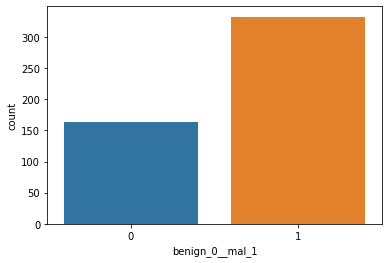

In [178]:
sns.countplot(df_o['benign_0__mal_1'])

In [179]:
df_o['benign_0__mal_1'].value_counts()

1    332
0    163
Name: benign_0__mal_1, dtype: int64

In [180]:
checkBalanced(df_o)

Fair with 32.92929292929293 of class A and 67.07070707070707 of class B


In [181]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_o.drop('benign_0__mal_1',axis=1))

StandardScaler()

In [182]:
scaled_features = scaler.transform(df_o.drop('benign_0__mal_1',axis=1))

In [183]:
df_label = df_o['benign_0__mal_1']

In [184]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [185]:
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,2.204465,-0.282612,2.068351,2.454131,-0.806833,-0.392414,0.206957,0.826142,0.154835,-0.922288,...,2.215670,-0.307819,1.938870,2.509421,-0.333961,-0.355468,0.004135,1.365129,-0.177083,0.524615
1,1.914972,0.595678,1.928754,2.024982,1.134031,1.588118,1.999878,2.601498,1.260931,-0.323008,...,1.871562,0.066720,1.716129,1.963460,0.644786,1.540072,1.226375,2.345448,1.561970,0.424590
2,2.112354,-1.148284,2.174252,2.352950,0.407963,0.927616,2.009614,1.875733,0.141923,-0.532395,...,1.621963,-1.498573,1.705522,1.667270,0.312202,-0.208860,0.931351,0.960963,-0.954921,-0.325600
3,-0.466770,-0.805044,-0.354381,-0.507699,2.554936,1.834284,1.357347,1.155812,1.338400,2.590363,...,-0.091304,-0.247752,-0.019839,-0.174851,2.293453,2.340040,1.724519,1.160466,2.311596,2.982183
4,1.441255,0.275153,1.428130,1.456271,-0.034703,0.347544,0.625576,0.943925,0.077365,-0.786909,...,1.704355,0.443027,1.740878,1.735792,0.635284,0.210246,0.804913,1.488959,0.453651,0.153688


## Feature Selection with ANOVA

In Machine Learning higher dimension/feature tend to have overfit, hence we do univariate feature, this method works by selecting the best features based on univariate statistical tests, and analyze the relationshop between one feature and the target variable.

In [186]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [187]:
sel_f = SelectKBest(f_classif, k=4)
X_train_f = sel_f.fit_transform(df_feat, df_label)
print(sel_f.get_support())

[False False False False False False False  True False False False False
 False False False False False False False False  True False  True  True
 False False False False False False]


From ANOVA test above these selected 4 best feature from all feature.

In [190]:
X_train_f

array([[0.82614227, 2.21566986, 1.93887045, 2.50942102],
       [2.60149804, 1.87156245, 1.71612918, 1.96345992],
       [1.87573334, 1.62196342, 1.70552245, 1.66727049],
       ...,
       [2.9397782 , 2.32714128, 2.19696748, 2.66635721],
       [1.67922332, 1.90064195, 1.80451857, 2.01208803],
       [0.29873275, 0.7592716 , 0.80395064, 0.67039415]])

In [191]:
X_train_f.shape

(495, 4)

## Building Model

### Approach 1: Use train_test_split and manually

In [223]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_f, df_label, test_size=0.3)

In [195]:
from sklearn import svm

In [208]:
model = svm.SVC(kernel='rbf',C=30,gamma='auto')
model.fit(X_train,y_train)

SVC(C=30, gamma='auto')

In [216]:
pred = model.predict(X_test)
pred

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [247]:
from sklearn.metrics import confusion_matrix,classification_report

#### Comparing Actual y Values with Predicted Values

In [221]:
confusion_matrix(y_test,pred)

array([[41,  8],
       [ 3, 97]], dtype=int64)

In [222]:
model.score(X_test, y_test)

0.9261744966442953

### Approach 2: Use cross_validation

Use different test set and train set with different fold.

In [225]:
from sklearn.model_selection import cross_val_score

#### With Single Cross validation with certain Parameter.

In [228]:
cross_val_score(svm.SVC(kernel='linear',C=10,gamma='auto'),X_train_f, df_label, cv=5)

array([0.90909091, 0.93939394, 0.92929293, 0.93939394, 0.93939394])

In [229]:
cross_val_score(svm.SVC(kernel='rbf',C=10,gamma='auto'),X_train_f, df_label, cv=5)

array([0.90909091, 0.92929293, 0.92929293, 0.93939394, 0.93939394])

#### Multiple Cross validation and multiple Parameter.

In [226]:
kernels = ['rbf', 'linear']
C = [1,10,20]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(svm.SVC(kernel=kval,C=cval,gamma='auto'),X_train_f, df_label, cv=5)
        avg_scores[kval + '_' + str(cval)] = np.average(cv_scores)

avg_scores

{'rbf_1': 0.9272727272727274,
 'rbf_10': 0.9292929292929293,
 'rbf_20': 0.9373737373737374,
 'linear_1': 0.9313131313131313,
 'linear_10': 0.9313131313131313,
 'linear_20': 0.9353535353535355}

### Approach 3: GridsearchCV

Doing exactly same as loop in Single Line.

In [230]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(X_train_f, df_label)
clf.cv_results_

{'mean_fit_time': array([0.00380173, 0.00260172, 0.00440297, 0.00439906, 0.00500727,
        0.00480261]),
 'std_fit_time': array([0.00098072, 0.00049006, 0.00049039, 0.00102616, 0.00179686,
        0.00074907]),
 'mean_score_time': array([0.00240216, 0.00100074, 0.00120087, 0.00080423, 0.0019979 ,
        0.00140166]),
 'std_score_time': array([8.00323543e-04, 3.23406696e-07, 4.00448271e-04, 4.02171351e-04,
        8.90710132e-04, 4.90271319e-04]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20

In [231]:
df_gsCV = pd.DataFrame(clf.cv_results_)
df_gsCV[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.927273
1,1,linear,0.931313
2,10,rbf,0.929293
3,10,linear,0.931313
4,20,rbf,0.937374
5,20,linear,0.935354


In [232]:
clf.best_params_

0.9373737373737374

In [234]:
clf.best_params_

{'C': 20, 'kernel': 'rbf'}

### Approach 3: With Different Model and Hyperparameter.

In [237]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [100, 300, 500, 800, 1000],
            'criterion': ['gini', 'entropy'],
            'bootstrap': [True, False]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [238]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train_f, df_label)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.937374,"{'C': 20, 'kernel': 'rbf'}"
1,random_forest,0.935354,"{'bootstrap': True, 'criterion': 'gini', 'n_es..."
2,logistic_regression,0.935354,{'C': 1}


#### With various trials hence the best model is svm with C:20, and kernel:'rbf'

## Adjustment with AUC and ROC curve.

In [270]:
svm_model = svm.SVC(kernel='rbf',C=20,gamma='auto',probability=True)
svm_model.fit(X_train,y_train)

SVC(C=20, gamma='auto', probability=True)

### In predict function there is no threshold / param that we could adjust. (fixed)

In [271]:
predictions = svm_model.predict(X_test)

In [272]:
CM = confusion_matrix(y_test,predictions)
CM

array([[42,  6],
       [ 3, 98]], dtype=int64)

In [273]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        48
           1       0.94      0.97      0.96       101

    accuracy                           0.94       149
   macro avg       0.94      0.92      0.93       149
weighted avg       0.94      0.94      0.94       149



In [274]:
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

 Class : 0 : Benign (noncancerous)
         1 : Malignant (cancerous)

In [259]:
print(f'{FP} noncancerous peoples predicted as cancerous')
print(f'{FN} cancerous peoples predicted as non-cancerous')

6 noncancerous peoples predicted as cancerous
3 cancerous peoples predicted as non-cancerous


#### In medical analysis, 3 false prediction is very crucial, thus, we expected that there is no any mistake in predict cancerous peoples as non-cancer, using build in function model.predict_proba(X_test) we could adjust the threshold and search where the FN is zero in confusion matrix.

**model.predict_proba return two column either probability is 0 or 1, for some instances that value is 0.02 it will be classified as 0 or 0.76 it will be classified as 1 depend on the threshold we set.

In [290]:
np.round(svm_model.predict_proba(X_test),2)

array([[0.03, 0.97],
       [0.05, 0.95],
       [0.02, 0.98],
       [0.06, 0.94],
       [0.05, 0.95],
       [0.03, 0.97],
       [0.9 , 0.1 ],
       [0.98, 0.02],
       [0.04, 0.96],
       [0.49, 0.51],
       [0.38, 0.62],
       [0.06, 0.94],
       [0.07, 0.93],
       [0.86, 0.14],
       [0.06, 0.94],
       [0.93, 0.07],
       [0.05, 0.95],
       [0.91, 0.09],
       [0.87, 0.13],
       [0.03, 0.97],
       [0.04, 0.96],
       [0.96, 0.04],
       [0.91, 0.09],
       [0.17, 0.83],
       [0.03, 0.97],
       [0.03, 0.97],
       [0.93, 0.07],
       [0.9 , 0.1 ],
       [0.03, 0.97],
       [0.07, 0.93],
       [0.05, 0.95],
       [0.07, 0.93],
       [0.92, 0.08],
       [0.71, 0.29],
       [0.03, 0.97],
       [1.  , 0.  ],
       [0.91, 0.09],
       [0.06, 0.94],
       [0.05, 0.95],
       [0.08, 0.92],
       [0.92, 0.08],
       [0.05, 0.95],
       [0.92, 0.08],
       [0.06, 0.94],
       [0.05, 0.95],
       [1.  , 0.  ],
       [0.06, 0.94],
       [0.05,

**we could only shown the class 1 probability with code below.

In [291]:
np.round(svm_model.predict_proba(X_test)[:,1],2)

array([0.97, 0.95, 0.98, 0.94, 0.95, 0.97, 0.1 , 0.02, 0.96, 0.51, 0.62,
       0.94, 0.93, 0.14, 0.94, 0.07, 0.95, 0.09, 0.13, 0.97, 0.96, 0.04,
       0.09, 0.83, 0.97, 0.97, 0.07, 0.1 , 0.97, 0.93, 0.95, 0.93, 0.08,
       0.29, 0.97, 0.  , 0.09, 0.94, 0.95, 0.92, 0.08, 0.95, 0.08, 0.94,
       0.95, 0.  , 0.94, 0.95, 0.09, 0.95, 0.47, 0.97, 0.97, 0.94, 0.96,
       0.97, 0.93, 0.87, 0.94, 0.79, 0.92, 0.92, 0.93, 0.96, 0.08, 0.78,
       0.96, 0.96, 0.95, 0.97, 0.94, 0.94, 0.06, 0.96, 0.01, 0.98, 0.98,
       0.1 , 0.95, 0.08, 0.96, 0.97, 0.96, 0.  , 0.  , 0.06, 0.94, 0.01,
       0.1 , 0.75, 0.94, 0.94, 0.97, 0.96, 0.98, 0.  , 0.  , 0.96, 0.09,
       0.94, 0.94, 0.09, 0.97, 0.97, 0.96, 0.94, 0.94, 0.96, 0.96, 0.94,
       0.96, 0.94, 0.07, 0.97, 0.06, 0.74, 0.15, 0.96, 0.25, 0.96, 0.97,
       0.69, 0.08, 0.95, 0.11, 0.95, 0.94, 0.97, 0.95, 0.95, 0.95, 0.96,
       0.94, 0.29, 0.97, 0.97, 0.94, 0.96, 0.03, 0.95, 0.97, 0.06, 0.97,
       0.94, 0.94, 0.77, 0.96, 0.08, 0.09])

**Example threshold being set at 0.4

In [293]:
import numpy as np
y_predict_th4 = np.where(svm_model.predict_proba(X_test)[:,1]>0.4,1,0) # Threshold is 0.4

In [294]:
pd.crosstab(y_test,y_predict_th4)

col_0,0,1
benign_0__mal_1,,
0,41,7
1,2,99


**From the confusion matrix above, with respect different threshold result in different error (FN,FP)

## Choosing Best Threshold.

In [299]:
import numpy as np
from sklearn.metrics import confusion_matrix

#with step per 0.1 threshold.
for thr in np.arange(0,1.0,0.1):
    y_predict = np.where(svm_model.predict_proba(X_test)[:,1]>thr,1,0)
    print("Threshold :",thr)
    print(confusion_matrix(y_test,y_predict))

Threshold : 0.0
[[  0  48]
 [  0 101]]
Threshold : 0.1
[[ 32  16]
 [  1 100]]
Threshold : 0.2
[[38 10]
 [ 2 99]]
Threshold : 0.30000000000000004
[[41  7]
 [ 2 99]]
Threshold : 0.4
[[41  7]
 [ 2 99]]
Threshold : 0.5
[[42  6]
 [ 2 99]]
Threshold : 0.6000000000000001
[[42  6]
 [ 3 98]]
Threshold : 0.7000000000000001
[[43  5]
 [ 4 97]]
Threshold : 0.8
[[45  3]
 [ 7 94]]
Threshold : 0.9
[[46  2]
 [ 8 93]]


**From observation we could minimize False negative to zero hence the best threshold is set at 0.5 since consideration in TP and TN.

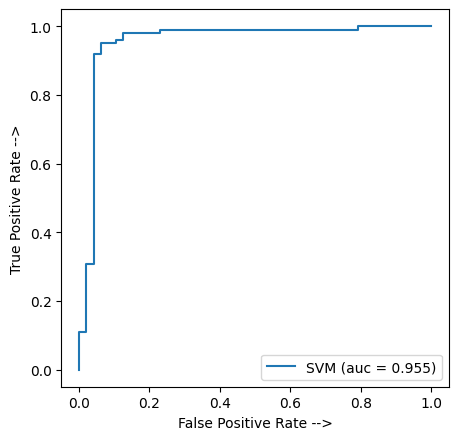

In [304]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, svm_model.predict_proba(X_test)[:,1],drop_intermediate=False)
auc_svm = auc(fpr, tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

## AUC Value is 0.955 that close to 1.